In [1]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [2]:
Univ = pd.read_csv("Universities.csv")
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [3]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [4]:
df_norm = norm_func(Univ.iloc[:,1:])
df_norm.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.637659,0.673333,0.331579,0.353684,0.340508,0.657333
std,0.264292,0.269915,0.259570,0.214071,0.262887,0.301926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.573171,0.638889,0.131579,0.263158,0.117293,0.466667
50%,0.682927,0.736111,0.289474,0.315789,0.343515,0.766667
75%,0.817073,0.861111,0.473684,0.421053,0.476864,0.900000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
kmeans_clust=KMeans(n_clusters=5)
kmeans_clust.fit(df_norm)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
kmeans_clust.labels_

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [9]:
df_norm.iloc[kmeans_clust.labels_==0,:]
df_norm.iloc[kmeans_clust.labels_==1,:]
df_norm.iloc[kmeans_clust.labels_==2,:]

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333
11,0.621951,0.791667,0.328947,0.263158,0.352609,0.733333
12,0.609756,0.736111,0.368421,0.368421,0.116965,0.900000
18,0.573171,0.930556,0.342105,0.578947,0.117293,0.366667
19,0.695122,0.652778,0.473684,0.368421,0.540832,0.666667
20,0.426829,0.513889,0.710526,0.526316,0.123307,0.600000


In [12]:
kmeans_clust.cluster_centers_[2].reshape(1,6).shape
#kmeans_clust.labels_

(1, 6)

In [18]:
Univ["clusterID"]=pd.Series(kmeans_clust.labels_)

result=Univ.iloc[:,1:].groupby(Univ.clusterID).count()
result


,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterID
clusterID,,,,,,,
0,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000,0
1,1272.500000,80.625000,33.000000,12.375000,22535.000000,91.125000,1
2,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429,2
3,1242.500000,74.250000,54.250000,13.750000,23504.000000,80.500000,3
4,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000,4


In [ ]:
kmeans_clust.cluster_centers_
Univ["clusterID"]=pd.Series(kmeans_clust.labels_)
Univ
kmeans_clust.cluster_centers_[0].shape

In [15]:
k = list(range(2,14))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    
    print("TWSS when k is",i,sum(WSS))
    TWSS.append(sum(WSS))
    


TWSS when k is 2 [9.18208121]
TWSS when k is 3 [7.85923615]
TWSS when k is 4 [6.85069476]
TWSS when k is 5 [6.00138182]
TWSS when k is 6 [5.53325158]
TWSS when k is 7 [5.02197857]
TWSS when k is 8 [4.50765527]
TWSS when k is 9 [3.96085533]
TWSS when k is 10 [3.66462642]
TWSS when k is 11 [2.95081356]
TWSS when k is 12 [2.58321292]
TWSS when k is 13 [2.30512747]


Text(0, 0.5, 'total_within_SS')

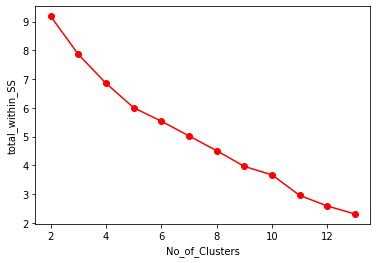

In [16]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")